In [36]:
import json
import os
import sys
import glob
import numpy as np
from matplotlib import pyplot as plt

In [37]:
import warnings
warnings.filterwarnings("ignore")

Locate results

In [38]:
results_dir = 'results/race_results.json'
with open(results_dir, 'r') as input_file:
    results_dict = json.load(input_file)

Extract results

In [57]:
models = list(results_dict.keys())
sizes = [results_dict[model]['model_size'] for model in models]
times = [np.diff(results_dict[model]['time']) for model in models]
counts = np.arange(len(times[0]))

Plot counts

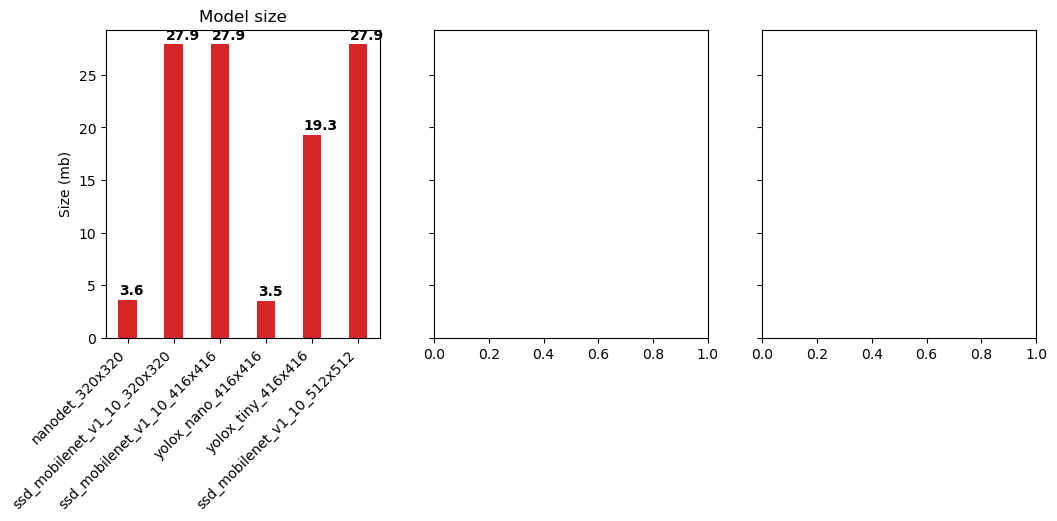

In [48]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4), sharey=True)
ax=axes.ravel()

ax[0].bar(models, sizes, color = 'tab:red', width = 0.4)
ax[0].set_title("Model size")
ax[0].set_ylabel("Size (mb)")
ax[0].set_xticklabels(models, rotation=45, ha="right")
for i, v in enumerate(sizes):
    ax[0].text(i - 0.175, v + 0.5, str(round(v,1)), color='k', fontweight='bold')

'''
ax[1].bar(type_keys, type_vals, color ='tab:blue', width = 0.4)
ax[1].set_title("Game type")
for i, v in enumerate(type_vals):
    ax[1].text(i - 0.125, v + 10, str(v), color='k', fontweight='bold')

ax[2].bar(ball_keys, ball_vals, color = 'tab:green', width = 0.4)
ax[2].set_title("Ball Size")
for i, v in enumerate(ball_vals):
    ax[2].text(i - 0.175, v + 10, str(v), color='k', fontweight='bold')
'''

#fig.tight_layout()
plt.show()

Plot object characteristics

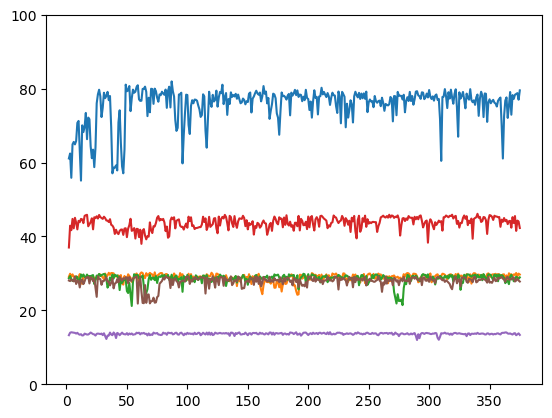

In [63]:
for i, name in enumerate(models):
    plt.plot(counts[1:],1/times[i])
plt.ylim([0, 100])
plt.show()